In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

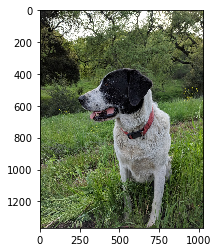

In [7]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

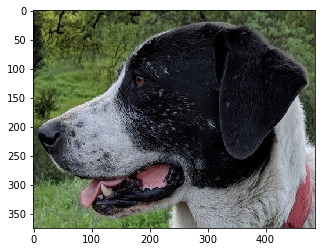

In [8]:
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [9]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

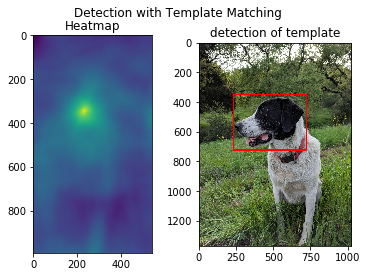

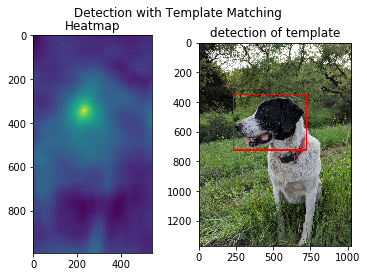

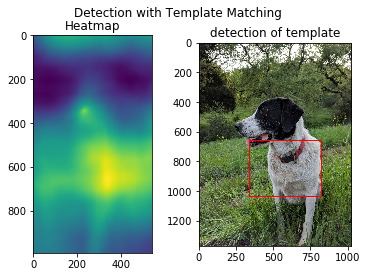

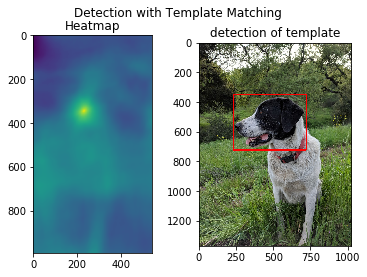

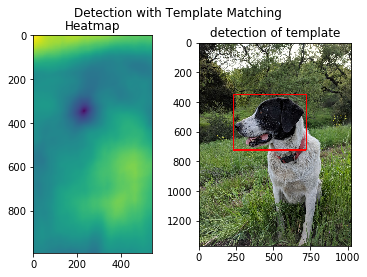

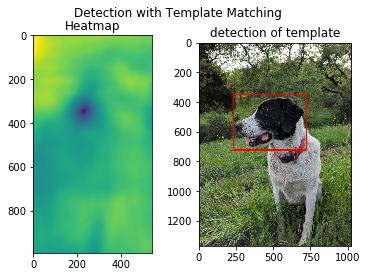

In [11]:
for m in methods:
    full_copy = full.copy()

    method = eval(m)
    result = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1]+height)

    # draw on to image
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0, 0), thickness = 6)

    # plot 1 row by two columns 
    plt.subplot(121)
    plt.imshow(result)
    plt.title("Heatmap")

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("detection of template")

    plt.suptitle(m)

    plt.show()
